Лабораторна №4 - Виконав ФБ-35 Кохта Андрій

Перший рівень

In [3]:
import pandas as pd
import numpy as np
import urllib.request
import os
import zipfile
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import time
import re

In [30]:
url_1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
zip_file_1 = "./Data1/household_power_consumption.zip"
data_file_1 = "./Data1/household_power_consumption.txt"

if not os.path.exists(data_file_1):
    urllib.request.urlretrieve(url_1, zip_file_1)
    with zipfile.ZipFile(zip_file_1, 'r') as zip_ref:
            zip_ref.extractall("./Data1")
    os.remove(zip_file_1)
else:
    print("File exists")

In [6]:
start_time= time.time()
df_pd = pd.read_csv(data_file_1, sep=';', low_memory=False)
not_numeric = ['Date', 'Time']

for col in df_pd.columns:
    if col not in not_numeric:
        df_pd[col] = pd.to_numeric(df_pd[col], errors='coerce')

df_pd.dropna()

df_pd['DateTime'] = pd.to_datetime(df_pd['Date'] + ' ' + df_pd['Time'], format='%d/%m/%Y %H:%M:%S')
df_pd['Time_obj'] = df_pd['DateTime'].dt.time

end_time = time.time() - start_time
print(f"Час на підготовку даних (Pandas): {end_time:.4f} сек")
print(f"Розмір DataFrame після очищення: {df_pd.shape}")

Час на підготовку даних (Pandas): 11.2214 сек
Розмір DataFrame після очищення: (2075259, 11)


In [9]:
start_time = time.time()
task_1_1_pd = df_pd[df_pd['Global_active_power'] > 5]
end_time = time.time() - start_time
print(task_1_1_pd)
print(f"\nЗнайдено: {len(task_1_1_pd)} записів.")
print(f"Час виконання: {end_time:.4f} сек")

               Date      Time  Global_active_power  Global_reactive_power  \
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
11       16/12/2006  17:35:00                5.412                  0.470   
12       16/12/2006  17:36:00                5.224                  0.478   
...             ...       ...                  ...                    ...   
2069356  22/11/2010  18:40:00                5.408                  0.150   
2069357  22/11/2010  18:41:00                5.528                  0.144   
2071586  24/11/2010  07:50:00                5.172                  0.050   
2071587  24/11/2010  07:51:00                5.750                  0.000   
2072997  25/11/2010  07:21:00                5.074                  0.240   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1    

In [ ]:
start_time = time.time()
task_1_2_pd = df_pd[df_pd['Voltage'] > 235]
end_time = time.time() - start_time
print(task_1_2_pd)
print(f"\nЗнайдено: {len(task_1_2_pd)} записів.")
print(f"Час виконання: {end_time:.4f} сек")

In [12]:
start_time = time.time()
task_1_3_pd = df_pd[
    (df_pd['Global_intensity'] >= 19) &
    (df_pd['Global_intensity'] <= 20) &
    (df_pd['Sub_metering_2'] > df_pd['Sub_metering_3'])
]
end_time = time.time() - start_time

print(task_1_3_pd)
print(f"\nЗнайдено: {len(task_1_3_pd)} записів.")
print(f"Час виконання: {end_time:.4f} сек")

               Date      Time  Global_active_power  Global_reactive_power  \
45       16/12/2006  18:09:00                4.464                  0.136   
460      17/12/2006  01:04:00                4.582                  0.258   
464      17/12/2006  01:08:00                4.618                  0.104   
475      17/12/2006  01:19:00                4.636                  0.140   
476      17/12/2006  01:20:00                4.634                  0.152   
...             ...       ...                  ...                    ...   
2071589  24/11/2010  07:53:00                4.666                  0.000   
2071590  24/11/2010  07:54:00                4.694                  0.000   
2071591  24/11/2010  07:55:00                4.602                  0.000   
2071592  24/11/2010  07:56:00                4.536                  0.000   
2071593  24/11/2010  07:57:00                4.626                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
45   

In [70]:
start_time = time.time()
random_rows_pd = 0

if len(df_pd) >= 500000:
    random_rows_pd = df_pd.sample(n=500000, replace=True)
    random_rows_pd['values'] = random_rows_pd[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean(axis=1)

end_time = time.time() - start_time

print(random_rows_pd)
print(f"Час виконання: {end_time:.4f} сек")

               Date      Time  Global_active_power  Global_reactive_power  \
593182     1/2/2008  15:46:00                1.564                  0.000   
686837     6/4/2008  16:41:00                0.406                  0.082   
113547     5/3/2007  13:51:00                1.546                  0.200   
1132814   10/2/2009  09:38:00                1.296                  0.000   
1568739  10/12/2009  03:03:00                0.250                  0.000   
...             ...       ...                  ...                    ...   
1076755    2/1/2009  11:19:00                3.514                  0.000   
1162126    2/3/2009  18:10:00                0.304                  0.052   
865323     8/8/2008  15:27:00                0.176                  0.152   
204468     7/5/2007  17:12:00                0.292                  0.200   
904330     4/9/2008  17:34:00                0.254                  0.096   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
59318

In [19]:
start_time = time.time()

filtered_for_1_5_pd = df_pd[
    (df_pd['Time'] > datetime.time(18, 0, 0)) &
    (df_pd['Global_active_power'] > 6) &
    (df_pd['Sub_metering_2'] > (df_pd['Sub_metering_1'] + df_pd['Sub_metering_3']))
]

half_len = len(filtered_for_1_5_pd) // 2
first_half = filtered_for_1_5_pd.iloc[:half_len:3]
second_half = filtered_for_1_5_pd.iloc[half_len::4]

task_1_5_pd = pd.concat([first_half, second_half])

end_time = time.time() - start_time

print(task_1_5_pd)
print(f"\nЗнайдено: {len(task_1_5_pd)} записів.")
print(f"Час виконання: {end_time:.4f} сек")

               Date      Time  Global_active_power  Global_reactive_power  \
41       16/12/2006  18:05:00                6.052                  0.192   
44       16/12/2006  18:08:00                6.308                  0.116   
17494    28/12/2006  20:58:00                6.386                  0.374   
17498    28/12/2006  21:02:00                8.088                  0.262   
17501    28/12/2006  21:05:00                7.230                  0.152   
...             ...       ...                  ...                    ...   
2066459  20/11/2010  18:23:00                9.656                  0.068   
2066465  20/11/2010  18:29:00                6.180                  0.306   
2066474  20/11/2010  18:38:00                6.302                  0.376   
2066478  20/11/2010  18:42:00                6.238                  0.344   
2066482  20/11/2010  18:46:00                6.438                  0.308   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
41   

numpy array

In [33]:
start_time = time.time()
temp_data_file_np = "./Data/household_power_consumption.txt"

types_np = [('Date', 'U10'), ('Time', 'U8'), ('Global_active_power', 'float64'),
            ('Global_reactive_power', 'float64'), ('Voltage', 'float64'),
            ('Global_intensity', 'float64'), ('Sub_metering_1', 'float64'),
            ('Sub_metering_2', 'float64'), ('Sub_metering_3', 'float64')]

numeric_cols_np = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df_np = np.genfromtxt(temp_data_file_np, delimiter=';', dtype=types_np, names=True,
                      missing_values='', filling_values=np.nan, encoding="UTF-8")

for col in numeric_cols_np:
    nan_np = np.isnan(df_np[col]).sum()
    print(f"{col}: {nan_np}")

not_null = ~np.isnan([df_np[field] for field in numeric_cols_np]).any(axis=0)
df_np = df_np[not_null]

for col in numeric_cols_np:
    nan_np = np.isnan(df_np[col]).sum()
    print(f"{col}: {nan_np}")

end_time = time.time() - start_time
print(df_np)
print(f"Час: {end_time:.4f} сек")

Global_active_power: 25979
Global_reactive_power: 25979
Voltage: 25979
Global_intensity: 25979
Sub_metering_1: 25979
Sub_metering_2: 25979
Sub_metering_3: 25979
Global_active_power: 0
Global_reactive_power: 0
Voltage: 0
Global_intensity: 0
Sub_metering_1: 0
Sub_metering_2: 0
Sub_metering_3: 0
[('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.)
 ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.) ...
 ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)]
Час: 9.2499 сек


In [36]:
start_time = time.time()
task_1_1_np = df_np[df_np['Global_active_power'] > 5]
end_time = time.time() - start_time

print(task_1_1_np)
print(f"\nЗнайдено: {len(task_1_1_np)} записів.")
print(f"Час виконання: {end_time:.4f} сек")

[('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0.,  1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0.,  2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0.,  1., 17.) ...
 ('24/11/2010', '07:50:00', 5.172, 0.05 , 235.18, 22. , 0., 38., 17.)
 ('24/11/2010', '07:51:00', 5.75 , 0.   , 234.4 , 24.6, 0., 39., 17.)
 ('25/11/2010', '07:21:00', 5.074, 0.24 , 238.55, 21.4, 1.,  2., 18.)]

Знайдено: 17547 записів.
Час виконання: 0.0170 сек


In [37]:
start_time = time.time()
task_1_2_np = df_np[df_np['Voltage'] > 235]
end_time = time.time() - start_time

print(task_1_2_np)
print(f"\nЗнайдено: {len(task_1_2_np)} записів.")
print(f"Час виконання: {end_time:.4f} сек")

[('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.)
 ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.) ...
 ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)]

Знайдено: 1952491 записів.
Час виконання: 0.1284 сек


In [38]:
start_time = time.time()

task_1_3_np = df_np[
    (df_np['Global_intensity'] >= 19) &
    (df_np['Global_intensity'] <= 20) &
    (df_np['Sub_metering_2'] > df_np['Sub_metering_3'])
]

end_time = time.time() - start_time

print(task_1_3_np)
print(f"\nЗнайдено: {len(task_1_3_np)} записів.")
print(f"Час виконання: {end_time:.4f} сек")

[('16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19. , 0., 37., 16.)
 ('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.)
 ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.) ...
 ('24/11/2010', '07:55:00', 4.602, 0.   , 237.08, 19.4, 0., 40., 17.)
 ('24/11/2010', '07:56:00', 4.536, 0.   , 237.03, 19. , 0., 39., 17.)
 ('24/11/2010', '07:57:00', 4.626, 0.   , 236.78, 19.4, 0., 39., 17.)]

Знайдено: 2509 записів.
Час виконання: 0.0899 сек


In [69]:
start_time = time.time()

if len(df_pd) >= 500000:
    random_indices_np = np.random.choice(len(df_np), size=500000, replace=True)
    random_rows = df_np[random_indices_np]

mean_sub_np = np.mean(np.array([random_rows['Sub_metering_1'], random_rows['Sub_metering_2'], random_rows['Sub_metering_3']]).T, axis=1)

task_1_4_np_with_means = np.rec.fromarrays([
        random_rows["Date"], random_rows["Time"], random_rows["Global_active_power"],
        random_rows["Global_reactive_power"], random_rows["Voltage"], random_rows["Global_intensity"],
        random_rows["Sub_metering_1"], random_rows["Sub_metering_2"], random_rows["Sub_metering_3"], mean_sub_np],
        names="Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,mean_value"
)

end_time = time.time() - start_time
print(task_1_4_np_with_means)
print(f"Час виконання: {end_time:.4f} сек")

[('5/6/2007', '09:16:00', 1.24 , 0.   , 232.57, 5.2, 0.,  0., 17.,  5.66666667)
 ('3/12/2009', '18:13:00', 0.792, 0.198, 241.03, 3.4, 0.,  1.,  1.,  0.66666667)
 ('28/1/2008', '12:58:00', 1.51 , 0.052, 239.62, 6.4, 0.,  0., 18.,  6.        )
 ...
 ('8/6/2009', '14:51:00', 0.362, 0.106, 241.01, 1.6, 0.,  0.,  1.,  0.33333333)
 ('19/9/2010', '11:15:00', 0.278, 0.068, 241.19, 1.2, 0.,  0.,  0.,  0.        )
 ('9/8/2007', '12:14:00', 2.212, 0.122, 231.88, 9.4, 0., 16., 17., 11.        )]
Час виконання: 0.5265 сек


In [58]:
start_time = time.time()

hours_np = np.array([int(t.split(':')[0]) for t in df_np['Time']])
minutes_np = np.array([int(t.split(':')[1]) for t in df_np['Time']])
time_in_minutes_np = hours_np * 60 + minutes_np

after_18_mask_np = time_in_minutes_np > 18 * 60
high_power_mask_np = df_np['Global_active_power'] > 6
group2_largest_mask_np = df_np['Sub_metering_2'] > (df_np['Sub_metering_1'] + df_np['Sub_metering_3'])

combined_mask_np_1_5 = after_18_mask_np & high_power_mask_np & group2_largest_mask_np
filtered_for_1_5_np = df_np[combined_mask_np_1_5]

half_len_np = len(filtered_for_1_5_np) // 2
first_half_np = filtered_for_1_5_np[:half_len_np:3]
second_half_np = filtered_for_1_5_np[half_len_np::4]
task_1_5_np = np.concatenate((first_half_np, second_half_np))

end_time = time.time() - start_time

print(task_1_5_np)
print(f"Час виконання: {end_time:.4f} сек")

[('16/12/2006', '18:05:00',  6.052, 0.192, 232.93, 26.2,  0., 37., 17.)
 ('16/12/2006', '18:08:00',  6.308, 0.116, 232.25, 27. ,  0., 36., 17.)
 ('28/12/2006', '20:58:00',  6.386, 0.374, 236.63, 27. ,  1., 36., 17.)
 ('28/12/2006', '21:02:00',  8.088, 0.262, 235.5 , 34.4,  1., 72., 17.)
 ('28/12/2006', '21:05:00',  7.23 , 0.152, 235.22, 30.6,  1., 73., 17.)
 ('28/12/2006', '21:08:00',  7.352, 0.   , 235.45, 31.2,  1., 73., 17.)
 ('28/12/2006', '21:11:00',  9.048, 0.   , 231.48, 39. , 34., 71., 16.)
 ('28/12/2006', '21:14:00',  9.118, 0.108, 231.18, 39.4, 36., 72., 16.)
 ('29/12/2006', '21:16:00',  6.146, 0.116, 230.53, 26.6,  0., 70.,  0.)
 ('29/12/2006', '21:19:00',  6.184, 0.138, 231.57, 26.6,  0., 70.,  0.)
 ('29/12/2006', '21:22:00',  6.214, 0.12 , 230.53, 26.8,  0., 70.,  0.)
 ('29/12/2006', '21:25:00',  6.086, 0.   , 229.04, 26.6,  0., 69.,  0.)
 ('29/12/2006', '21:29:00',  6.66 , 0.   , 229.  , 29. ,  0., 69., 17.)
 ('29/12/2006', '22:28:00',  6.3  , 0.294, 236.08, 26.8,  0., 65

Другий рівень(ускладнений)

In [97]:
url_level2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
data_file_level2 = "./Data1/auto-mpg.data"

if not os.path.exists(data_file_level2):
    urllib.request.urlretrieve(url_level2, data_file_level2)
else:
    print("Датасет вже існує.")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

Pandas

In [98]:
start_time = time.time()

df_auto_pd = pd.read_csv(data_file_level2, names=column_names, sep='\\s+', na_values='?')
print(df_auto_pd.isna().sum())

df_auto_pd = df_auto_pd.dropna()

print(df_auto_pd.isna().sum())
print(df_auto_pd.head())
end_time = time.time() - start_time
print(f"Час виконання: {end_time:.4f} сек")

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1    

In [99]:
def normalize_series_pd(series):
    return (series - series.min()) / (series.max() - series.min())

def standardize_series_pd(series):
    return (series - series.mean()) / series.std()

start_time = time.time()
df_auto_pd['horsepower_normalized'] = normalize_series_pd(df_auto_pd['horsepower'])
df_auto_pd['horsepower_standardized'] = standardize_series_pd(df_auto_pd['horsepower'])
end_time = time.time() - start_time

print(df_auto_pd[['horsepower', 'horsepower_normalized', 'horsepower_standardized', 'car_name']])
print(f"\nЧас: {end_time:.4f} сек")

     horsepower  horsepower_normalized  horsepower_standardized  \
0         130.0               0.456522                 0.663285   
1         165.0               0.646739                 1.572585   
2         150.0               0.565217                 1.182885   
3         150.0               0.565217                 1.182885   
4         140.0               0.510870                 0.923085   
..          ...                    ...                      ...   
393        86.0               0.217391                -0.479835   
394        52.0               0.032609                -1.363154   
395        84.0               0.206522                -0.531795   
396        79.0               0.179348                -0.661694   
397        82.0               0.195652                -0.583754   

                      car_name  
0    chevrolet chevelle malibu  
1            buick skylark 320  
2           plymouth satellite  
3                amc rebel sst  
4                  ford torino

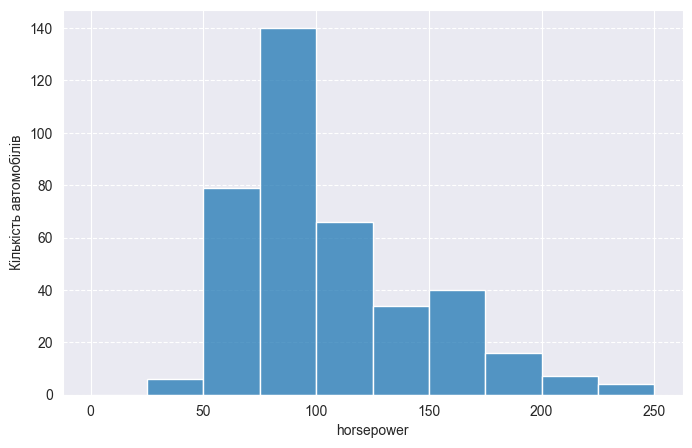


Час: 0.1944 сек


In [100]:
start_time = time.time()

horsepower_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
plt.figure(figsize=(8, 5))
sns.histplot(df_auto_pd['horsepower'], bins=horsepower_bins, kde=False)

plt.xlabel('horsepower')
plt.ylabel('Кількість автомобілів')
plt.grid(axis='y', linestyle='--')
plt.show()

end_time = time.time() - start_time
print(f"\nЧас: {end_time:.4f} сек")

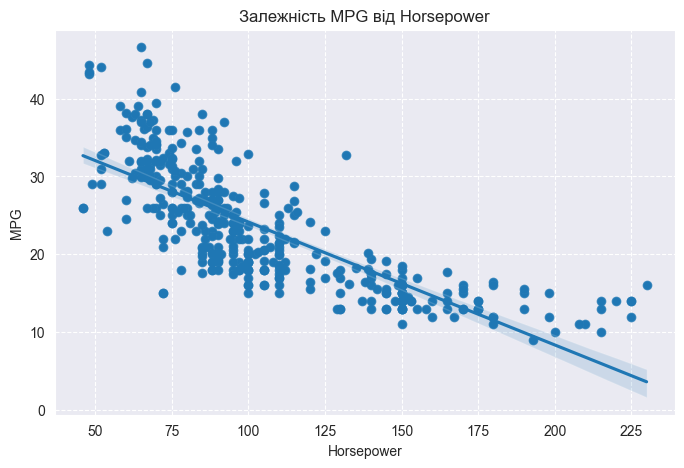


Час: 0.3385 сек


In [101]:
start_time = time.time()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_auto_pd, x='horsepower', y='mpg')
sns.regplot(data=df_auto_pd, x='horsepower', y='mpg')
plt.title('Залежність MPG від Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True, linestyle='--')
plt.show()

end_time = time.time() - start_time
print(f"\nЧас: {end_time:.4f} сек")

In [102]:
start_time = time.time()

pearson_corr_pd, pearson_p_pd = pearsonr(df_auto_pd['horsepower'], df_auto_pd['mpg'])
spearman_corr_pd, spearman_p_pd = spearmanr(df_auto_pd['horsepower'], df_auto_pd['mpg'])
end_time = time.time() - start_time

print(f"Пірсон коеф: {pearson_corr_pd:.4f}, p-value = {pearson_p_pd:.4g}")
print(f"Спірмен коеф: {spearman_corr_pd:.4f}, p-value = {spearman_p_pd:.4g}")
print(f"\nЧас: {end_time:.4f} сек")

Пірсон коеф: -0.7784, p-value = 7.032e-81
Спірмен коеф: -0.8536, p-value = 1.619e-112

Час: 0.0034 сек


In [109]:
start_time = time.time()

df_copy_pd = df_auto_pd
df_copy_pd['brand'] = df_copy_pd['car_name'].str.split().str[0]
df_auto_pd_ohe = pd.get_dummies(df_copy_pd, columns=['brand'])

end_time = time.time() - start_time

print(df_auto_pd_ohe.filter(like='brand_').head())
print(f"\nЧас: {end_time:.4f} сек")

   brand_amc  brand_audi  brand_bmw  brand_buick  brand_cadillac  brand_capri  \
0      False       False      False        False           False        False   
1      False       False      False         True           False        False   
2      False       False      False        False           False        False   
3       True       False      False        False           False        False   
4      False       False      False        False           False        False   

   brand_chevroelt  brand_chevrolet  brand_chevy  brand_chrysler  ...  \
0            False             True        False           False  ...   
1            False            False        False           False  ...   
2            False            False        False           False  ...   
3            False            False        False           False  ...   
4            False            False        False           False  ...   

   brand_renault  brand_saab  brand_subaru  brand_toyota  brand_toyouta  \

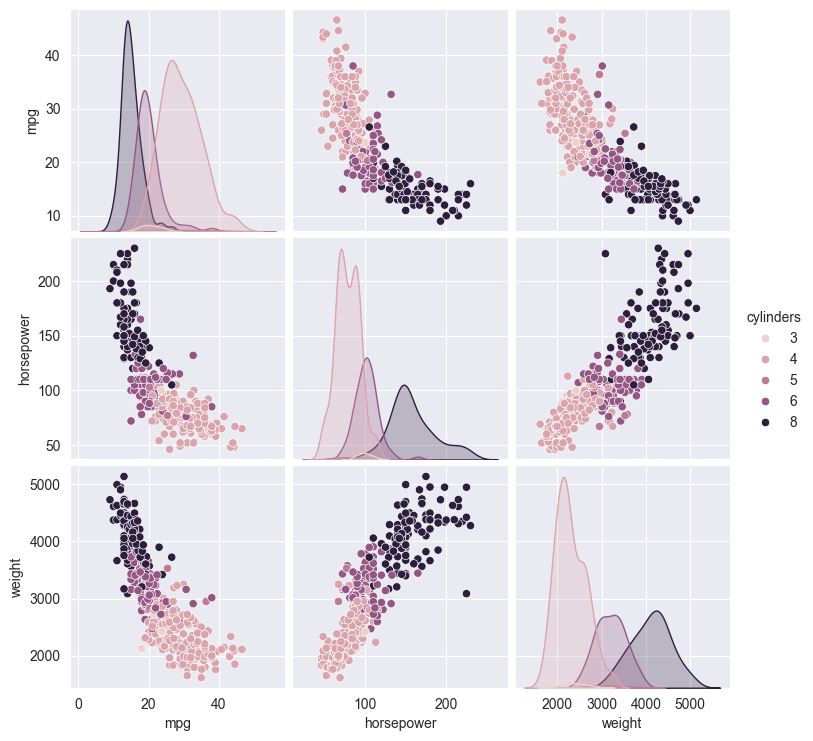


Час: 3.2388 сек


In [117]:
start_time = time.time()

selected_cols_for_pairplot_pd = ['mpg', 'cylinders', 'horsepower', 'weight']
pairplot_pd = sns.pairplot(df_auto_pd[selected_cols_for_pairplot_pd], hue='cylinders', diag_kind='kde')
plt.show()
pairplot_pd.savefig("./Data/L2_Task7_Pandas_Pairplot.png")
plt.close()

end_time = time.time() - start_time
print(f"\nЧас: {end_time:.4f} сек")